# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

da = pd.read_csv("nhanes_2015_2016.csv")
# print(da.columns)
# print(f'Num columns: {len(da.columns)}')

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
# Create DMDMARTLx with corresponding text labels
da['DMDMARTLx'] = da.DMDMARTL.replace({1:'Married', 2:'Widowed', 3:'Divorced', 4:'Separated', 5:'Never married', 6:'Living w partner'
    , 77:'Refused', 99:"Don't Know"})
da.DMDMARTLx.fillna('Missing')
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})


# Frequency table for everyone
print('Frequency table for DMDMARTLx')
print(da.DMDMARTLx.value_counts())

# Frequency table by gender
women = da[da['RIAGENDR'] == 2]
men   = da[da['RIAGENDR'] == 1]
print('\nFrequency table for women')
print(women.DMDMARTLx.value_counts())
print('\nFrequency table for men')
print(men.DMDMARTLx.value_counts())

Frequency table for DMDMARTLx
Married             2780
Never married       1004
Divorced             579
Living w partner     527
Widowed              396
Separated            186
Refused                2
Name: DMDMARTLx, dtype: int64

Frequency table for women
Married             1303
Never married        520
Divorced             350
Widowed              296
Living w partner     262
Separated            118
Refused                1
Name: DMDMARTLx, dtype: int64

Frequency table for men
Married             1477
Never married        484
Living w partner     265
Divorced             229
Widowed              100
Separated             68
Refused                1
Name: DMDMARTLx, dtype: int64


In [3]:
# Filter to look only at population of people between 30 and 40
da_30s = da.loc[(da['RIDAGEYR'] > 30) & (da['RIDAGEYR'] <= 40)]
print('Frequency table for DMDMARTLx for 30-somethings')
print(da_30s.DMDMARTLx.value_counts())

# Frequency table by gender
women = da_30s[da_30s['RIAGENDR'] == 2]
men   = da_30s[da_30s['RIAGENDR'] == 1]
print('\nFrequency table for women')
print(women.DMDMARTLx.value_counts())
print('\nFrequency table for men')
print(men.DMDMARTLx.value_counts())

Frequency table for DMDMARTLx for 30-somethings
Married             516
Never married       186
Living w partner    129
Divorced             67
Separated            29
Widowed               4
Refused               1
Name: DMDMARTLx, dtype: int64

Frequency table for women
Married             258
Never married        97
Living w partner     57
Divorced             43
Separated            17
Widowed               2
Name: DMDMARTLx, dtype: int64

Frequency table for men
Married             258
Never married        89
Living w partner     72
Divorced             24
Separated            12
Widowed               2
Refused               1
Name: DMDMARTLx, dtype: int64


__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

## Women vs men
When comparing women vs men for all ages, we find that women are distinctly more likely to be divorced than men (9% vs 5%). Men are more likely to be living with partner (16% vs 12%)

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

### Women overall vs women aged 30-40
The more noticeable difference between these groups is that 30-something women are much less likely to be widowed. Further, they more likely to be living with partner and less likely to be divorced compared with women overall.

__Q1c.__ Repeat part b for the men.

### Men overall vs men aged 30-40
For men overall, widowhood is twice as prevelant as separation. But for 30-something men are 6 times more likely to be separated than widowed.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [4]:
# insert your# Create agegrp by cutting RIDAGEYR into 10 year bands
da['agegrp'] = pd.cut(da.RIDAGEYR, [15, 25, 35, 45, 55, 65, 75, 85])

# Consider only women
women = da[da['RIAGENDRx'] == 'Female']

# Group on agegroup, count up results and normalize to percentages
x = women.groupby('agegrp')['DMDMARTLx'].value_counts().unstack().apply(lambda x: x/x.sum(), axis=1)

# pd.options.display.float_format = '{:,.2f}'.format
x.style.format('{:.3f}')

DMDMARTLx,Divorced,Living w partner,Married,Never married,Refused,Separated,Widowed
agegrp,,,,,,,
"(15, 25]",0.011,0.198,0.161,0.601,nan,0.029,nan
"(25, 35]",0.045,0.184,0.467,0.283,nan,0.021,nan
"(35, 45]",0.129,0.091,0.567,0.149,nan,0.052,0.012
"(45, 55]",0.169,0.069,0.542,0.110,nan,0.061,0.049
"(55, 65]",0.180,0.047,0.529,0.107,0.002,0.049,0.087
"(65, 75]",0.196,0.028,0.429,0.053,nan,0.050,0.244
"(75, 85]",0.096,0.008,0.292,0.054,nan,0.012,0.538


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

We see the "Never married" category decreasing *nearly* monotonically as women age. This is a reasonable sanity check, since it would never decrease for a specified set of women. Widowhood increases steadily as one might expect. The "Married" category is very roughly a bell curve peaking in the 35-45 group. 

__Q2b.__ Repeat the construction for males.

In [5]:
# Consider only men
men = da[da['RIAGENDRx'] == 'Male']

# Group on agegroup, count up results and normalize to percentages
x = men.groupby('agegrp')['DMDMARTLx'].value_counts().unstack().apply(lambda x: x/x.sum(), axis=1)

x.style.format('{:.3f}')

DMDMARTLx,Divorced,Living w partner,Married,Never married,Refused,Separated,Widowed
agegrp,,,,,,,
"(15, 25]",0.004,0.135,0.119,0.734,nan,0.008,nan
"(25, 35]",0.019,0.212,0.458,0.287,nan,0.017,0.006
"(35, 45]",0.064,0.137,0.627,0.130,0.002,0.034,0.005
"(45, 55]",0.113,0.071,0.687,0.094,nan,0.025,0.009
"(55, 65]",0.143,0.054,0.636,0.105,nan,0.028,0.034
"(65, 75]",0.140,0.047,0.656,0.047,nan,0.047,0.064
"(75, 85]",0.115,0.016,0.619,0.024,nan,0.016,0.210


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

The peak age group for men to be married is later than for women (45-55 vs 35-45). Men are much more likely than women to be married later in life, and they are much less likely to be widowed later in life compared with women. We might speculate that men dying earlier accounts for much of the difference.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

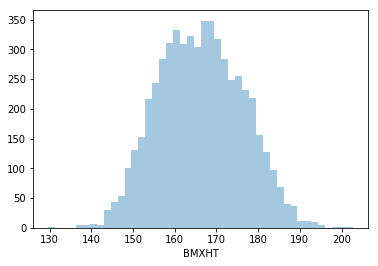

In [6]:
# Default basic histogram on BMXHT
# More modern version:
# sns.histplot(da['BMXHT'])
sns.distplot(da['BMXHT'].dropna(), kde=False)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

### Excessively small number of bins
An overly small number of bins hides details. We see the very very rough distribution, but outliers are lost.

### Exceessively large number of bins
An overly large number of bins hides trends. We see too much detail to comprehend the dataset quickly. Peaks and valleys due to rounding of measurements are evident.

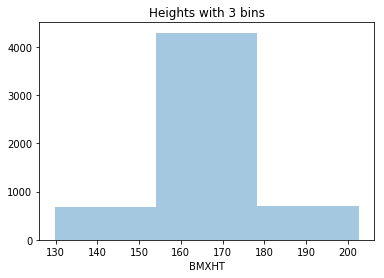

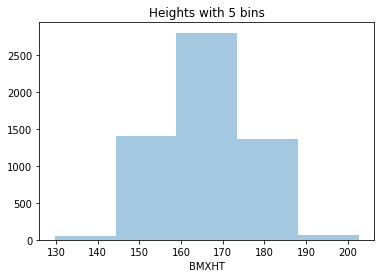

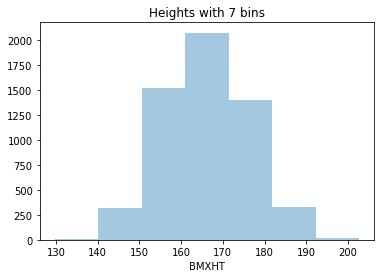

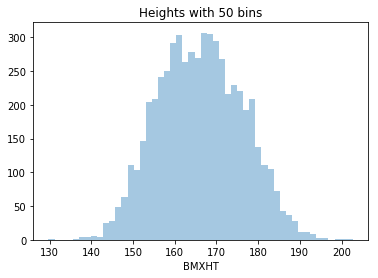

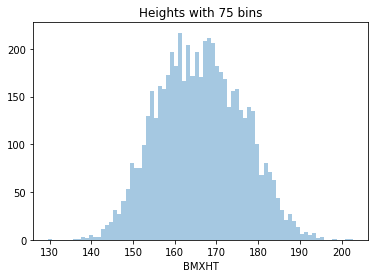

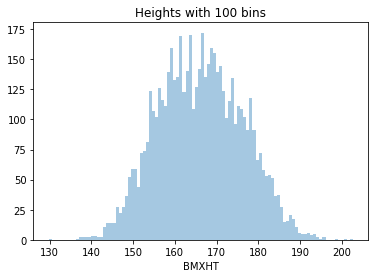

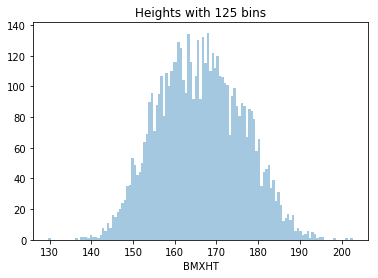

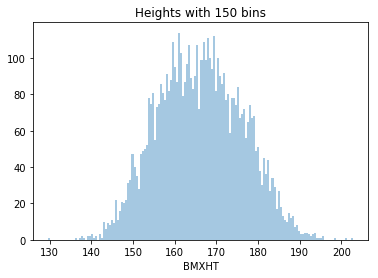

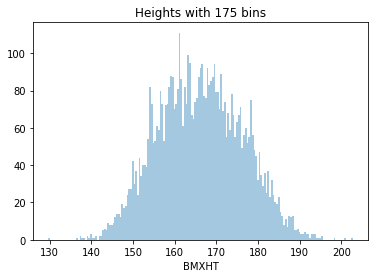

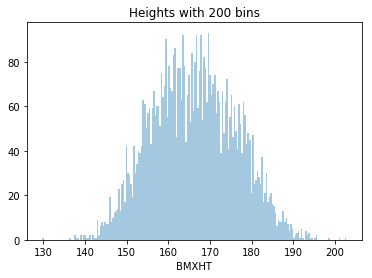

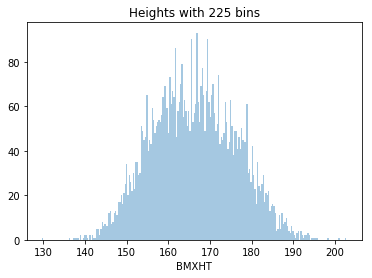

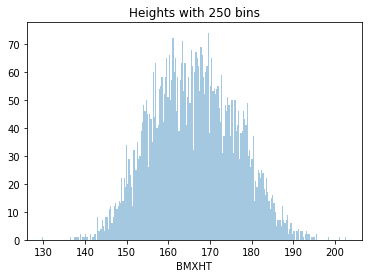

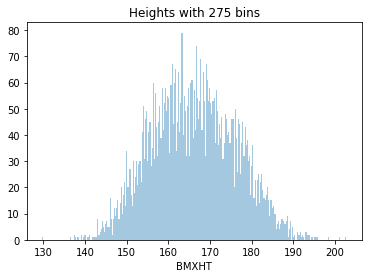

In [7]:
# oldschool
# Very small number of bins
for i in range(3, 8, 2):
    sns.distplot(da['BMXHT'].dropna(), kde=False, bins=i).set_title('Heights with {} bins'.format(i))
    plt.show()

# Very large number of bins
for i in range(50, 300, 25):
    sns.distplot(da['BMXHT'].dropna(), kde=False, bins=i).set_title('Heights with {} bins'.format(i))
    plt.show()


__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

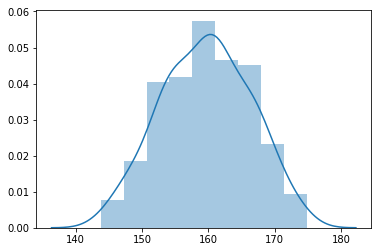

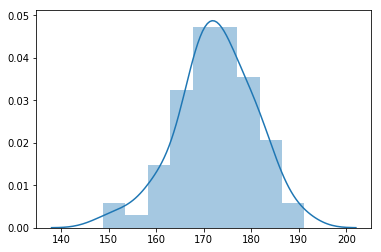

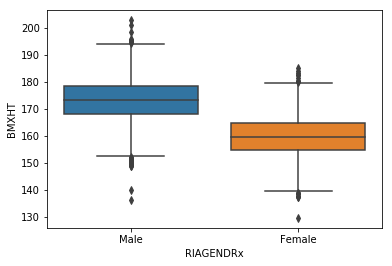

In [8]:
# Histograms for men and women separately (but same range for easy comparison)
women = da[da['RIAGENDRx'] == 'Female'].dropna()
h = sns.distplot(women.loc[:,['BMXHT']])
plt.show()

men = da[da['RIAGENDRx'] == 'Male'].dropna()
h = sns.distplot(men.loc[:,['BMXHT']])
plt.show()

bp = sns.boxplot(data=da, x='RIAGENDRx', y='BMXHT')

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

Text(0.5,1,'Change in Systolic Blood Pressure from 1st reading to 2nd reading (mm Hg)')

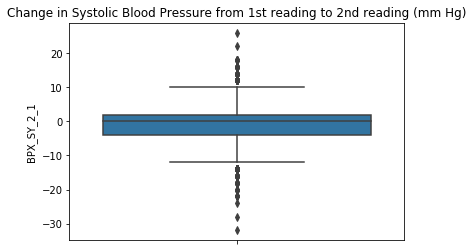

In [9]:
# calculate the difference between BPXSY1 and BPXSY2
# unit is "mm Hg"
da['BPX_SY_2_1'] = da.BPXSY2 - da.BPXSY1
sns.boxplot(y=da.BPX_SY_2_1).set_title('Change in Systolic Blood Pressure from 1st reading to 2nd reading (mm Hg)')

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [10]:
# The boxplot above indicates that the median value is approximately 0, 
# meaning exactly half of respondants increased and half decreased.
# Next we confirm this quantitatively.
# Note that the median is indeed 0.00000
da.BPX_SY_2_1.describe()

count    5369.000000
mean       -0.674986
std         5.046465
min       -32.000000
25%        -4.000000
50%         0.000000
75%         2.000000
max        26.000000
Name: BPX_SY_2_1, dtype: float64

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

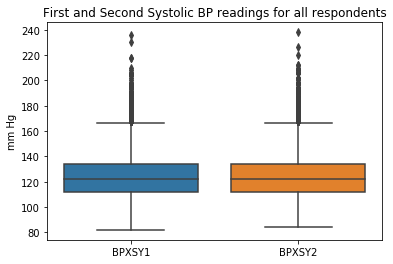

In [11]:
p = sns.boxplot(data=da.loc[:,['BPXSY1', 'BPXSY2']])
p.set(ylabel='mm Hg')
p.set_title('First and Second Systolic BP readings for all respondents')
plt.show()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

### variation within individual readings
Of note is that all outliers are above the 3rd quartile rather than below the first. High blood pressure outliers are relatively common, while low pressure outliers do not appear to exist.

### variation between readings
The two plots are very similar. On average there is no significant change from the first reading to the second reading.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [12]:
d = {
      1: "<9"
    , 2: "9-11"
    , 3: "HS/GED"
    , 4: "Some college/AA"
    , 5: "College"
    , 7: "Refused"
    , 9: "Don't know"
}
dx = da.groupby(['DMDEDUC2'])['DMDHHSIZ'].value_counts(normalize=True)
# dx = dx
dx = dx.unstack()
dx.index = dx.index.map(d).rename('Education Level')
dx = dx.rename_axis('Household Size', axis=1)
print(dx)

Household Size          1         2         3         4         5         6         7
Education Level                                                                      
<9               0.109924  0.224427  0.146565  0.132824  0.148092  0.108397  0.129771
9-11             0.116641  0.222395  0.163297  0.152411  0.146190  0.113530  0.085537
HS/GED           0.152614  0.270658  0.171164  0.161889  0.109612  0.065767  0.068297
Some college/AA  0.151141  0.268970  0.193091  0.169031  0.122147  0.050586  0.045034
College          0.142753  0.347731  0.193997  0.165447  0.095168  0.029283  0.025622
Don't know            NaN  0.666667       NaN       NaN  0.333333       NaN       NaN


__Q5a.__ Comment on any major differences among the distributions.

We see that large family sizes are far more common in families with lower education levels.
A household size of 7 occurs about 57% as often as a household size of 2 for people with an education level below 9th grade. In contrast a household size of 7 occurs about 7% as often as a household size of 2 for people with a college education.
A household size of 2 appears to be the most common across all education levels. 

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [13]:
# Median household size for Women and Men by Education Level
df = da.loc[((da['RIDAGEYR']>=30) & (da['RIDAGEYR']<=40)),['DMDHHSIZ','RIAGENDRx','DMDEDUC2']].groupby(['DMDEDUC2','RIAGENDRx']).median().unstack()
df.index = df.index.map(d).rename('Education Level')
df = df.rename_axis(['Household size','Gender'], axis=1)
df.style

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [14]:
da_6 = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRx']).mean()

# Means for all MVUs
print(da_6.loc[:,['RIDAGEYR','BMXHT','BMXBMI']])

df = pd.DataFrame()
df['MVU Min'] = da_6.loc[:,['RIDAGEYR','BMXHT','BMXBMI']].min()
df['MVU Max'] = da_6.loc[:,['RIDAGEYR','BMXHT','BMXBMI']].max()
df['Ratio'] = df['MVU Min'] / df['MVU Max']
df

                             RIDAGEYR       BMXHT     BMXBMI
SDMVSTRA SDMVPSU RIAGENDRx                                  
119      1       Female     47.663265  159.570408  30.052041
                 Male       47.861111  172.741667  26.958333
         2       Female     52.987952  159.244578  27.849398
                 Male       54.363636  172.906818  27.160465
120      1       Female     43.636364  155.402041  32.419388
                 Male       43.130000  169.537755  30.939175
         2       Female     43.736111  159.218056  27.400000
                 Male       45.219178  173.075342  27.727397
121      1       Female     44.397959  158.871579  30.856842
                 Male       46.750000  172.177885  29.416505
         2       Female     44.376344  160.229032  26.470968
                 Male       42.063158  174.764516  26.273118
122      1       Female     42.897436  161.315385  29.447436
                 Male       44.653061  173.998969  28.528866
         2       Female 

,MVU Min,MVU Max,Ratio
RIDAGEYR,42.063158,55.638462,0.756009
BMXHT,155.402041,176.974157,0.878106
BMXBMI,25.744444,32.984127,0.780510


__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

The mean age is widely distributed across the MVUs from 42 to 55. There is perhaps a peak around 45.


The mean heights appear to fall into 2 separate groupings. One group clusters around a mean height of 160cm, the other group clusters around a mean height of 173cm. These value correspond to the mean heights of Females and Males in the survey.


BMI of the groups appears to follow a normal distribution with a mean of 29.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [16]:
da_6 = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRx'])[['RIDAGEYR','BMXHT','BMXBMI']]
da_6.quantile(0.25)
# da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRx'])['RIDAGEYR','BMXHT','BMXBMI'].quantile(0.75)
# da_6.loc[:,['RIDAGEYR','BMXHT','BMXBMI']]

df = pd.DataFrame()
df[['RIDAGEYR Q1','BMXHT Q1','BMXBMI Q1']] = da_6.quantile(0.25)
df[['RIDAGEYR Q3','BMXHT Q3','BMXBMI Q3']] = da_6.quantile(0.75)
df['RIDAGEYR IQR'] = df['RIDAGEYR Q3'] - df['RIDAGEYR Q1']
df['BMXHT IQR'] = df['BMXHT Q3'] - df['BMXHT Q1']
df['BMXBMI IQR'] = df['BMXBMI Q3'] - df['BMXBMI Q1']
print(df)

# print(df.loc[:,['RIDAGEYR IQR','BMXHT IQR','BMXBMI IQR']].describe())

df_mm = pd.DataFrame()
df_mm['MVU Min'] = df.loc[:,['RIDAGEYR IQR','BMXHT IQR','BMXBMI IQR']].min()
df_mm['MVU Max'] = df.loc[:,['RIDAGEYR IQR','BMXHT IQR','BMXBMI IQR']].max()
df_mm['Ratio'] = df_mm['MVU Min'] / df_mm['MVU Max']
df_mm

                            RIDAGEYR Q1  BMXHT Q1  BMXBMI Q1  RIDAGEYR Q3  BMXHT Q3  BMXBMI Q3  RIDAGEYR IQR  BMXHT IQR  BMXBMI IQR
SDMVSTRA SDMVPSU RIAGENDRx                                                                                                         
119      1       Female           31.50   154.575     23.925        62.75   163.900     33.675         31.25      9.325       9.750
                 Male             32.50   168.825     23.150        62.25   177.825     28.500         29.75      9.000       5.350
         2       Female           35.50   154.350     22.500        69.00   164.300     31.850         33.50      9.950       9.350
                 Male             40.00   167.000     24.100        69.00   178.225     29.400         29.00     11.225       5.300
120      1       Female           30.50   151.050     28.125        57.00   159.800     36.900         26.50      8.750       8.775
                 Male             31.75   163.675     25.700        55.50   

,MVU Min,MVU Max,Ratio
RIDAGEYR IQR,20.750,38.00,0.546053
BMXHT IQR,7.575,12.30,0.615854
BMXBMI IQR,4.100,11.75,0.348936


__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.

The IQR for Age appears to follow a normal distribution with a median of 30.

The IQR for Height has an unclear distribution with 11 being the mode.

The IQR for BMI has an unclear distribution with 8 being the most common.